In [38]:
import pandas as pd
import numpy as np
import numpy
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from math import sqrt
import math
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import matplotlib.image as mpimg
from PIL import Image
import time
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from scipy.stats import norm
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from pandas.core.frame import DataFrame
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
import copy
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from functools import partial
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras as tfk
from sklearn.metrics import classification_report

In [25]:
cifar10 = tfk.datasets.cifar10

In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


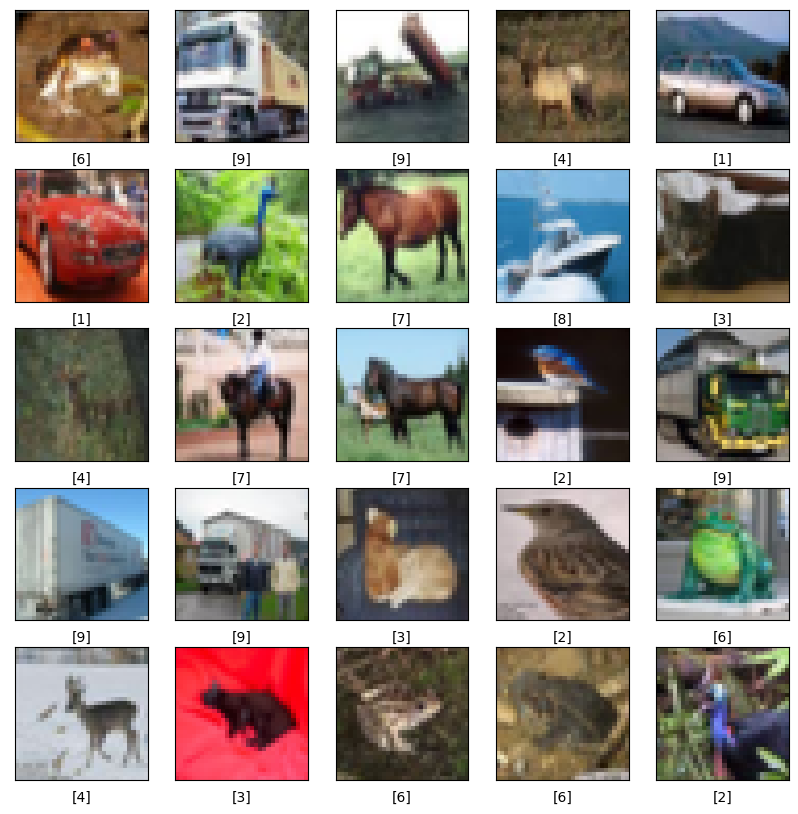

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

In [29]:
np.max(x_train)

255

In [30]:
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
x_train = x_train/255
x_test = x_test/255

In [32]:
model.summary()
tfk.utils.plot_model(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [33]:
temp=np.unique(y_train)
numCls=len(temp)
y_trainOT=to_categorical(y_train, numCls)
y_testOT=to_categorical(y_test, numCls)

In [41]:
model = tf.keras.models.Sequential()
model.add(tfk.layers.Dense(256,
                       input_dim=3*32*32,
                       activation=partial(tf.nn.leaky_relu, alpha=0.01)))
model.add(tfk.layers.Dense(30,
                       activation=partial(tf.nn.leaky_relu, alpha=0.01)))
model.add(tfk.layers.Dense(10,
                       activation=tf.keras.activations.softmax))
model.compile(
            optimizer=optimizers.SGD(learning_rate=0.01),
            loss=losses.categorical_crossentropy,
            metrics=["accuracy"]
            )
model.fit(x_train, y_trainOT,
          validation_data=(x_test, y_testOT),
          epochs=10,
          batch_size=32
         )

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8741 - accuracy: 0.3273 - val_loss: 1.7404 - val_accuracy: 0.3805
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6927 - accuracy: 0.3995 - val_loss: 1.6974 - val_accuracy: 0.3991
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6113 - accuracy: 0.4272 - val_loss: 1.6319 - val_accuracy: 0.4229
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5540 - accuracy: 0.4492 - val_loss: 1.6299 - val_accuracy: 0.4115
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5085 - accuracy: 0.4646 - val_loss: 1.5344 - val_accuracy: 0.4581
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4718 - accuracy: 0.4786 - val_loss: 1.5130 - val_accuracy: 0.4645
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4392 - accuracy: 0.4887 - val_loss: 1.4590 - val_accuracy:

In [43]:
p_y_train = model.predict(x_train)
p_y_train = np.argmax(p_y_train, axis=1)
p_y_test = model.predict(x_test)
p_y_test = np.argmax(p_y_test, axis=1)

313/313 [==============================] - 0s 1ms/step


In [44]:
classification_report(y_train, p_y_train)

'              precision    recall  f1-score   support\n\n           0       0.54      0.51      0.53      5000\n           1       0.45      0.81      0.58      5000\n           2       0.46      0.27      0.34      5000\n           3       0.49      0.19      0.28      5000\n           4       0.61      0.18      0.28      5000\n           5       0.49      0.28      0.36      5000\n           6       0.56      0.47      0.51      5000\n           7       0.26      0.88      0.40      5000\n           8       0.88      0.22      0.35      5000\n           9       0.57      0.49      0.53      5000\n\n    accuracy                           0.43     50000\n   macro avg       0.53      0.43      0.41     50000\nweighted avg       0.53      0.43      0.41     50000\n'

In [45]:
classification_report(y_test, p_y_test)

'              precision    recall  f1-score   support\n\n           0       0.54      0.51      0.52      1000\n           1       0.43      0.78      0.56      1000\n           2       0.42      0.24      0.31      1000\n           3       0.41      0.17      0.24      1000\n           4       0.56      0.17      0.26      1000\n           5       0.44      0.25      0.32      1000\n           6       0.55      0.48      0.51      1000\n           7       0.25      0.85      0.38      1000\n           8       0.84      0.21      0.34      1000\n           9       0.55      0.45      0.49      1000\n\n    accuracy                           0.41     10000\n   macro avg       0.50      0.41      0.39     10000\nweighted avg       0.50      0.41      0.39     10000\n'

In [50]:
print(classification_report(y_train, p_y_train))
print("")
print("")
print("")
print(classification_report(y_test, p_y_test))

              precision    recall  f1-score   support

           0       0.54      0.51      0.53      5000
           1       0.45      0.81      0.58      5000
           2       0.46      0.27      0.34      5000
           3       0.49      0.19      0.28      5000
           4       0.61      0.18      0.28      5000
           5       0.49      0.28      0.36      5000
           6       0.56      0.47      0.51      5000
           7       0.26      0.88      0.40      5000
           8       0.88      0.22      0.35      5000
           9       0.57      0.49      0.53      5000

    accuracy                           0.43     50000
   macro avg       0.53      0.43      0.41     50000
weighted avg       0.53      0.43      0.41     50000




              precision    recall  f1-score   support

           0       0.54      0.51      0.52      1000
           1       0.43      0.78      0.56      1000
           2       0.42      0.24      0.31      1000
           3       0.

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3402 - accuracy: 0.5233 - val_loss: 1.4718 - val_accuracy: 0.4802
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3208 - accuracy: 0.5311 - val_loss: 1.4275 - val_accuracy: 0.4970
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2996 - accuracy: 0.5419 - val_loss: 1.4985 - val_accuracy: 0.4559
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2813 - accuracy: 0.5459 - val_loss: 1.3856 - val_accuracy: 0.5094
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2675 - accuracy: 0.5527 - val_loss: 1.3904 - val_accuracy: 0.5077
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2509 - accuracy: 0.5578 - val_loss: 1.4207 - val_accuracy: 0.4993
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2318 - accuracy: 0.5620 - val_loss: 1.3875 - val_accuracy:

AttributeError: 'History' object has no attribute 'modelPlt'

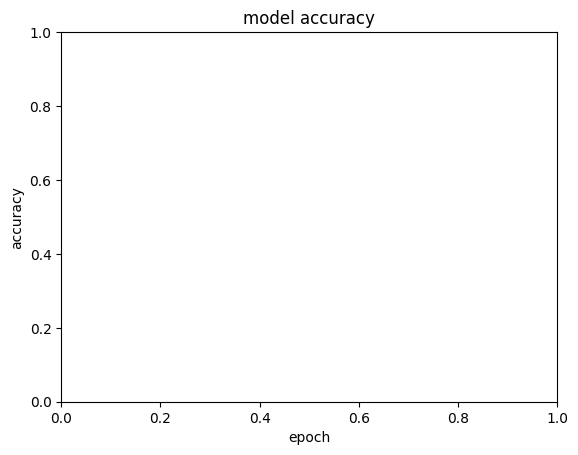

In [51]:
modelPlt = model.fit(x_train, y_trainOT,
          validation_data=(x_test, y_testOT),
          epochs=10,
          batch_size=32
         )

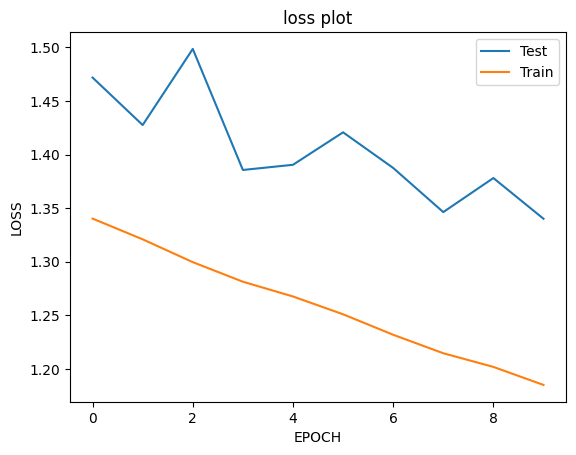

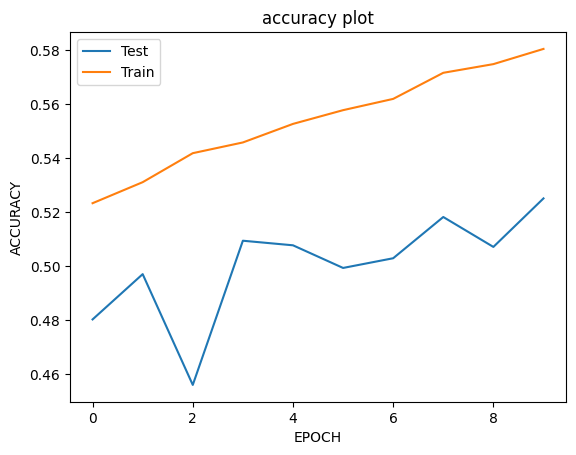

In [59]:
plt.title("loss plot")
plt.ylabel("LOSS")
plt.xlabel("EPOCH")
plt.plot(modelPlt.history['val_loss'])
plt.plot(modelPlt.history['loss'])
plt.legend(['Test', 'Train'])
plt.show()
plt.title("accuracy plot")
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH")
plt.plot(modelPlt.history['val_accuracy'])
plt.plot(modelPlt.history['accuracy'])
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

## EPOCH:

<div dir="rtl">
    در آموزش شبکه عصبی، epoch به یک تکرار کامل در کل مجموعه داده Train گفته میشود. در طول هر دوره، پارامترهای مدل بر اساس خطای محاسبه شده بر روی داده های آموزشی به روزرسانی می شوند.
تعداد epochها برای آموزش مان تأثیر خوبی بر روی عملکرد مدل مان دارد. آموزش برای epoch های بسیار کم می تواند منجر به underfitting شود، جایی که مدل به اندازه کافی در معرض داده های آموزشی برای یادگیری الگوهای اساسی قرار نگرفته است. از سوی دیگر، آموزش برای دوره های بیش از حد می تواند منجر به overfitting شود، جایی که مدل داده های آموزشی را به خاطر سپرده است و نمی تواند به خوبی به داده های جدید و دیده نشده تعمیم دهد. پس از یک حدی کمتر یا بیشتر نباید بشود.
</div>

## LOSS FUNCTION:

In [60]:
model = tf.keras.models.Sequential()
model.add(tfk.layers.Dense(256,
                       input_dim=3*32*32,
                       activation=partial(tf.nn.leaky_relu, alpha=0.01)))
model.add(tfk.layers.Dense(30,
                       activation=partial(tf.nn.leaky_relu, alpha=0.01)))
model.add(tfk.layers.Dense(10,
                       activation=tf.keras.activations.softmax))
model.compile(
            optimizer=optimizers.Adam(learning_rate=0.001),
            loss=losses.mse,
            metrics=["accuracy"]
            )
model.fit(x_train, y_trainOT,
          validation_data=(x_test, y_testOT),
          epochs=10,
          batch_size=32
         )

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.0847 - accuracy: 0.2293 - val_loss: 0.0814 - val_accuracy: 0.2829
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0790 - accuracy: 0.3231 - val_loss: 0.0760 - val_accuracy: 0.3671
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0762 - accuracy: 0.3619 - val_loss: 0.0740 - val_accuracy: 0.3872
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0744 - accuracy: 0.3851 - val_loss: 0.0737 - val_accuracy: 0.3936
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0728 - accuracy: 0.4052 - val_loss: 0.0723 - val_accuracy: 0.4051
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0716 - accuracy: 0.4207 - val_loss: 0.0721 - val_accuracy: 0.4146
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0706 - accuracy: 0.4286 - val_loss: 0.0706 - val_a

<div dir="rtl">
    مشاهده میکنیم که نسبت به دفعه ی قبل accuracy کمتر میشود. از آنجایی که بین مسائل classification و regression تفاوت میباشد و مورد اول جواب هایش محدود هست به همین دلیل برای مسئله های regression روش mse مناسب میباشد و برای مسائل classification روش crossentropy مناسب میباشد.
</div>